In [14]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy
import copy
from tqdm import tqdm
import pickle
from datetime import datetime

In [15]:
!git clone https://github.com/Samuele-Caccavelli/bayesian_statistics_project.git
%cd bayesian_statistics_project

Cloning into 'bayesian_statistics_project'...
remote: Enumerating objects: 164, done.
remote: Counting objects: 100% (164/164), done.
remote: Compressing objects: 100% (113/113), done.
remote: Total 164 (delta 77), reused 128 (delta 46), pack-reused 0 (from 0)
Receiving objects: 100% (164/164), 8.94 MiB | 16.61 MiB/s, done.
Resolving deltas: 100% (77/77), done.
/content/bayesian_statistics_project/bayesian_statistics_project/bayesian_statistics_project


In [16]:
import sys, os
sys.path.insert(0, os.path.dirname(os.path.abspath('../../main_code')))
from main_code.MCMCs import Neal_3, PPMx
from main_code.data_generation import generate_gaussian_mixture
from main_code.visualization import plot_clusters
from main_code.partitions_analysis import find_optimal_clustering

# ASSUMPTION:
compute_lamb_0 definisce uno degli hyperpatamemtri da cambiare

# SYNTHETIC DATA

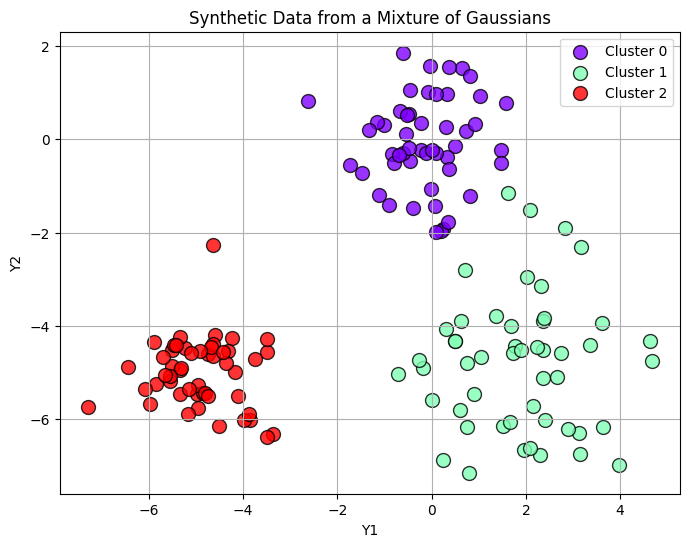

MCMC Progress:  12%|█▏        | 12/100 [20:34<2:30:50, 102.85s/step]


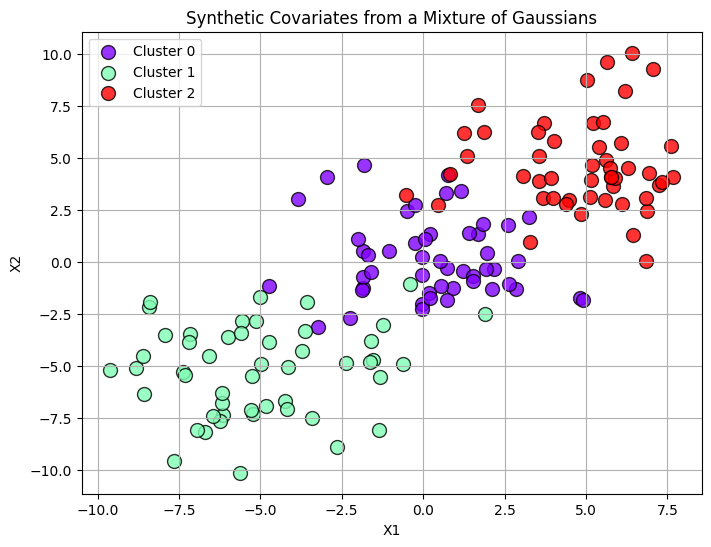

In [18]:
# Sample syntethic
np.random.seed(42)  # for reproducibility
random.seed(42)

# Y
means = [[0, 0], [2, -5], [-5, -5]]
covariances = [np.eye(2), 2 * np.eye(2), 0.5 * np.eye(2)]
n_samples = [50, 50, 50]

Y, labels = generate_gaussian_mixture(means, covariances, n_samples)

plot_clusters(Y, labels, "Synthetic Data from a Mixture of Gaussians", xlabel="Y1", ylabel="Y2")


# X
means_X = [[0, 0], [-5, -5], [5, 5]]
covariances_X = [np.eye(2)*5, np.eye(2)*5, np.eye(2)*5]

X, _ = generate_gaussian_mixture(means_X, covariances_X, n_samples)

plot_clusters(X, labels, "Synthetic Covariates from a Mixture of Gaussians")

We try to cluster the data using only the Y data.

First step is to create a Neal_3 object. By default the hyper-parameters  and  are set to alpha=0.1 and lamb_0=1 but they can be given as arguments when creating the object. Other hyper-parameters needs to be changed in the file or manually after creating the object.

In [27]:
neal_3 = Neal_3()

# barra di output non stampata per mptivi di efficenza
sys.stdout = open(os.devnull, 'w')  # Disabilita la stampa
history = neal_3.fit(Y, 1000, metrics=["entropy"])
sys.stdout = sys.__stdout__  # Riattiva la stampa


MCMC Progress: 100%|██████████| 1000/1000 [05:34<00:00,  2.99step/s]


# Simulazione
alpha è uno degli hyperparametri da cambiare.

Similarity Matrix Progress: 100%|██████████| 1001/1001 [00:03<00:00, 305.84step/s]


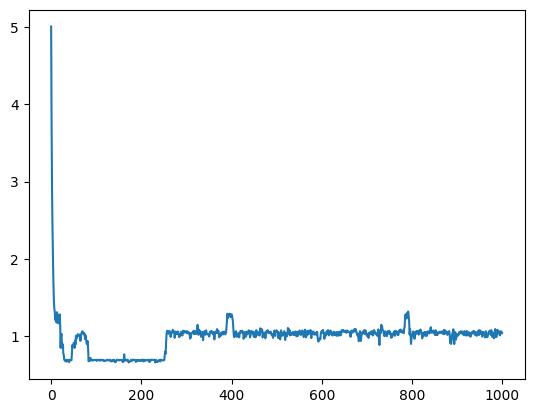

In [28]:
# Trying our clustering algorithm without covariates

neal_3.compute_similarity_matrix()
plt.figure()
plt.plot(neal_3.metrics["entropy"])
plt.show()

In [29]:
burnin = 200
optimal_clustering, optimal_loss = find_optimal_clustering(neal_3.history[burnin:], neal_3.similatity_matrix,
                                                           loss="binder", alpha=1.0, beta=1.0)
print("The loss is equal to: ", optimal_loss)

Point Estimate Progress: 100%|██████████| 801/801 [00:28<00:00, 27.74step/s]


<Figure size 640x480 with 0 Axes>

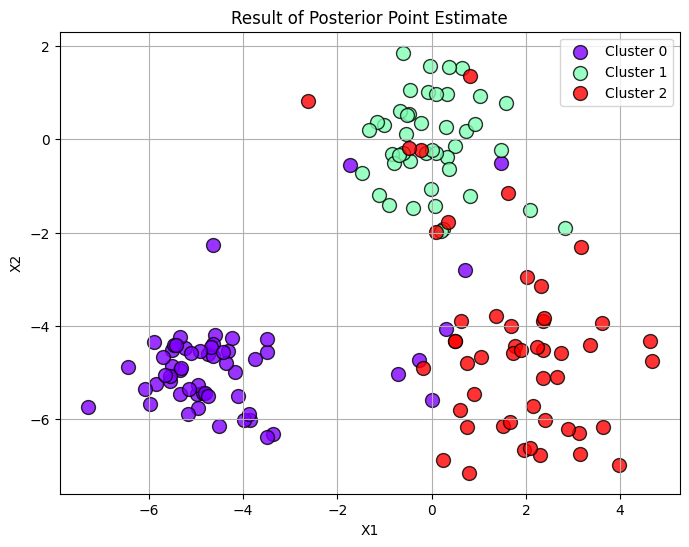

In [30]:
plt.figure()
plot_clusters(Y, optimal_clustering, "Result of Posterior Point Estimate")